In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("Eezybuy Customer Behavior Survey.csv")

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week 

In [4]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
               age  Customer_Reviews_Importance  \
count  1227.000000                  1225.000000   
mean     30.950285                     2.480816   
std      10.252122                     1.181903   
min       3.000000                     1.000000   
25%      23.000000                     1.000000   
50%      27.000000                     3.000000   
75%      36.000000                     3.000000   
max      67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                             1226.000000       1227.000000   
mean                                 2.685971          2.667482   
std                                  1.048263          0.904192   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000     

In [5]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     4
Search_Result_Exploration                 0
Customer_Reviews_Importance               2
Add_to_Cart_Browsing                      2
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  1
Saveforlater_Frequency                    0
Review_Left                               2
Review_Reliability                        1
Review_Helpfulness                        1
Personalized_Recommendation_Frequency     1
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Are

In [6]:
data.dropna(inplace=True)

In [7]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Are

In [35]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

# Display the duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate rows:")
print(duplicate_data)

Number of duplicate rows: 13
Duplicate rows:
     age             Gender      Purchase_Frequency  \
602   24               Male       Few times a month   
603   23             Female  Less than once a month   
604   26             Female       Few times a month   
605   29               Male   Multiple times a week   
606   46  Prefer not to say       Few times a month   
607   24               Male  Less than once a month   
608   33             Female       Few times a month   
609   33             Female             Once a week   
610   31  Prefer not to say            Once a month   
611   40  Prefer not to say       Few times a month   
612   37               Male             Once a week   
613   25  Prefer not to say       Few times a month   
614   60             Female             Once a week   

                                   Purchase_Categories  \
602      Beauty and Personal Care;Clothing and Fashion   
603                           Beauty and Personal Care   
604      B

In [41]:
# Drop duplicate rows and overwrite the original DataFrame
data = data.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", data.shape)

# Display the first few rows of the DataFrame without duplicates
print("DataFrame without duplicates:")
print(data.head())

Shape of DataFrame after removing duplicates: (1207, 23)
DataFrame without duplicates:
   age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3        

In [43]:
# Define the bins for age groups to prevent outliers
bins = [0, 18, 25, 35, 45, 55, 65, 100]  

# Define labels for the age groups
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+'] 

# Create a new column 'age_group' with age groups based on the 'age' column
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify changes made
print(data.head())

   age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                 

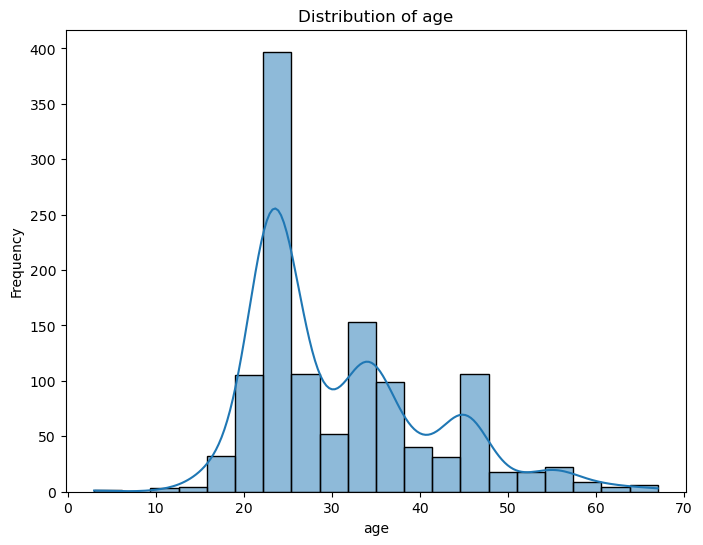

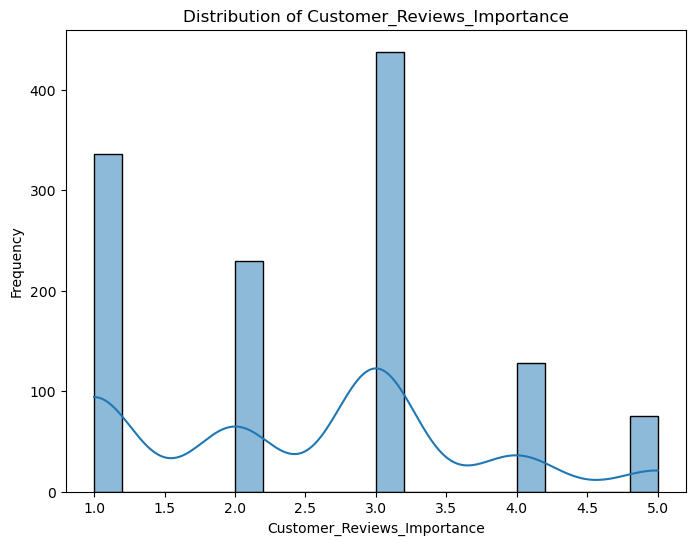

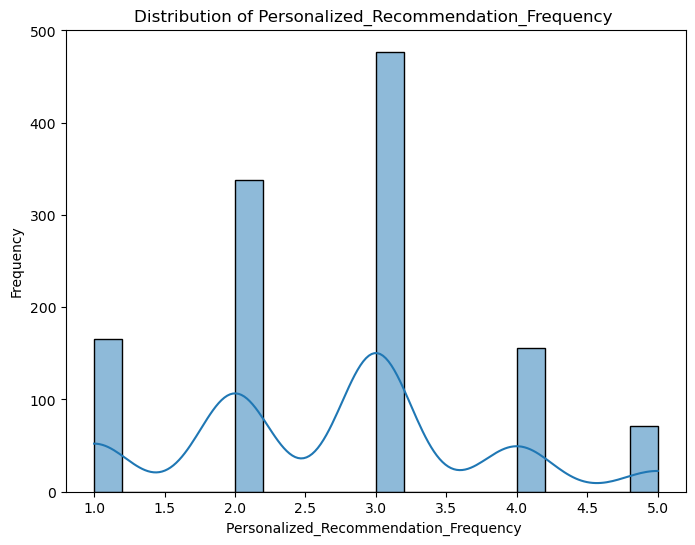

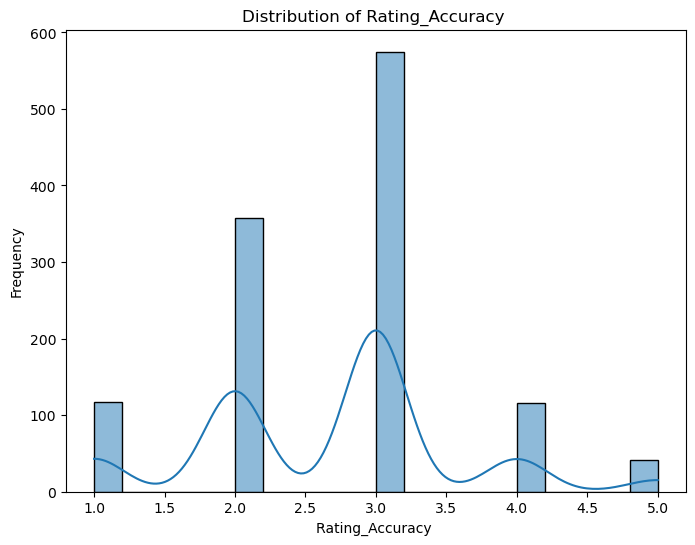

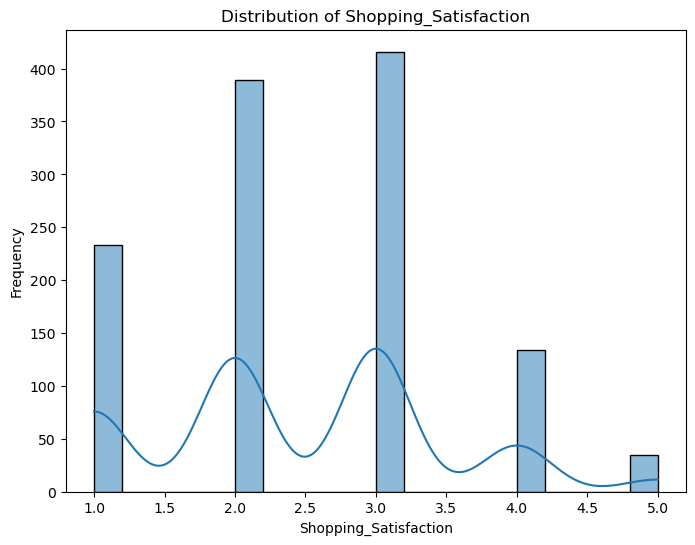

In [45]:
# Visualize the distribution of numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

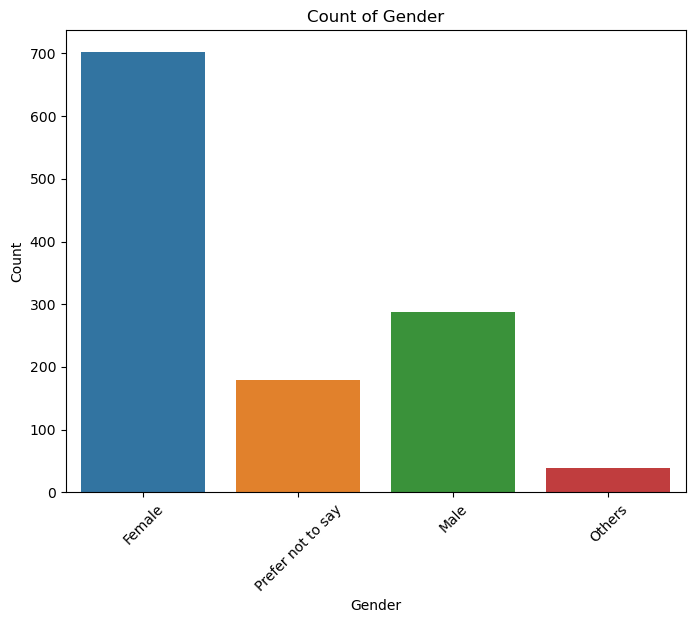

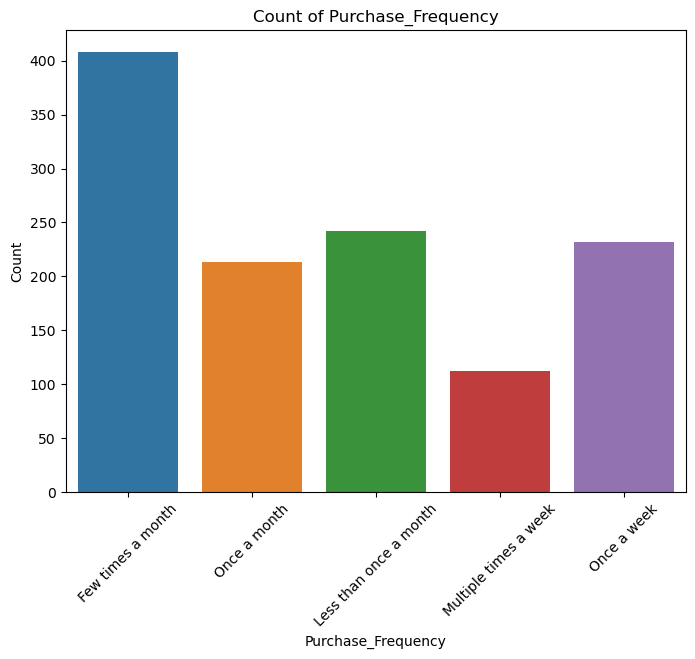

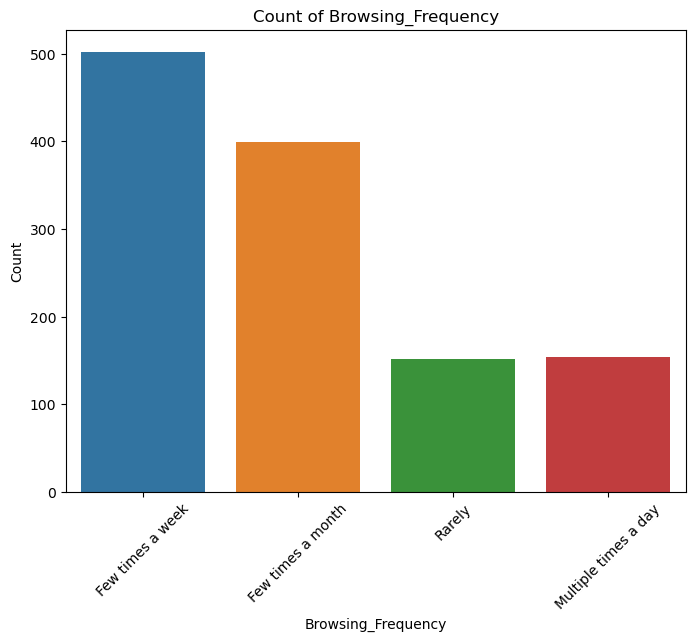

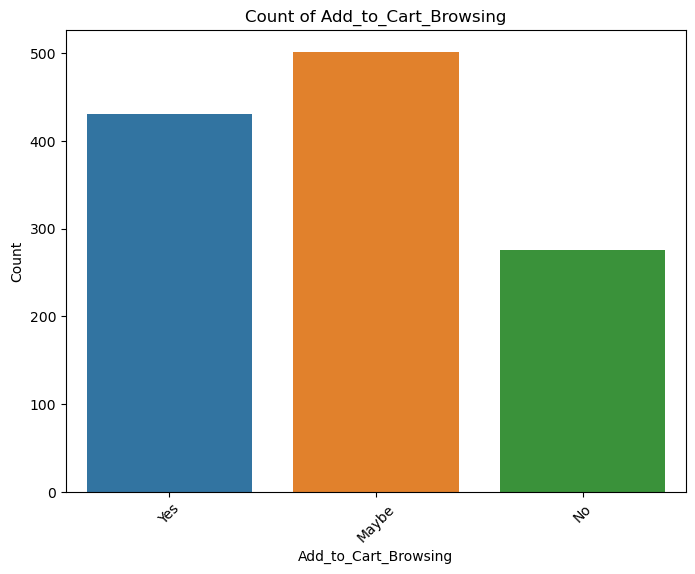

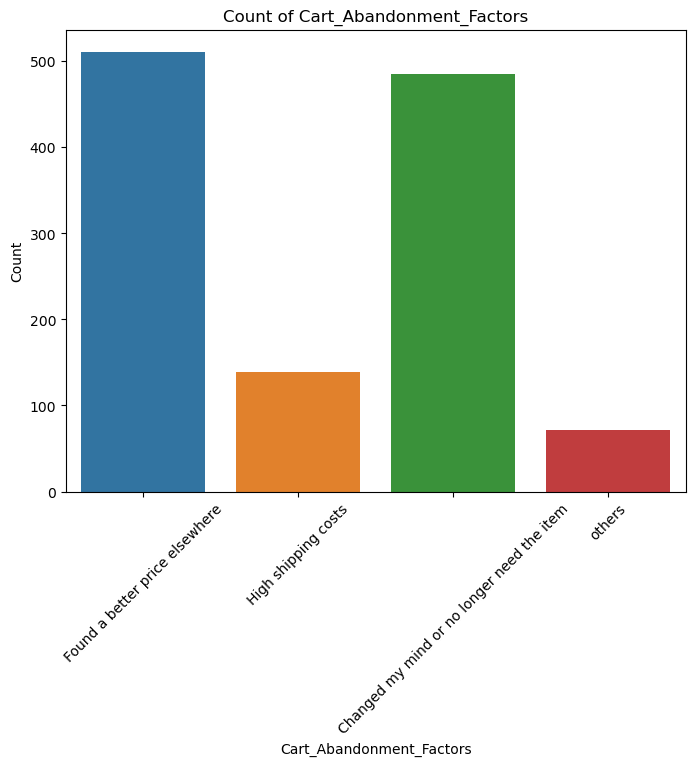

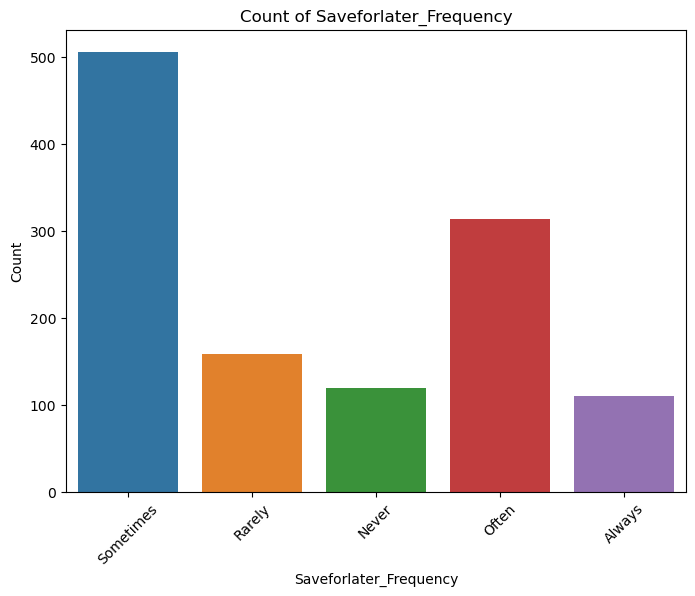

In [49]:
# Define the categorical features
categorical_features = [
    'Gender', 'Purchase_Frequency', 'Browsing_Frequency', 'Add_to_Cart_Browsing', 
    'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 
]
# Visualize the count of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\tosin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


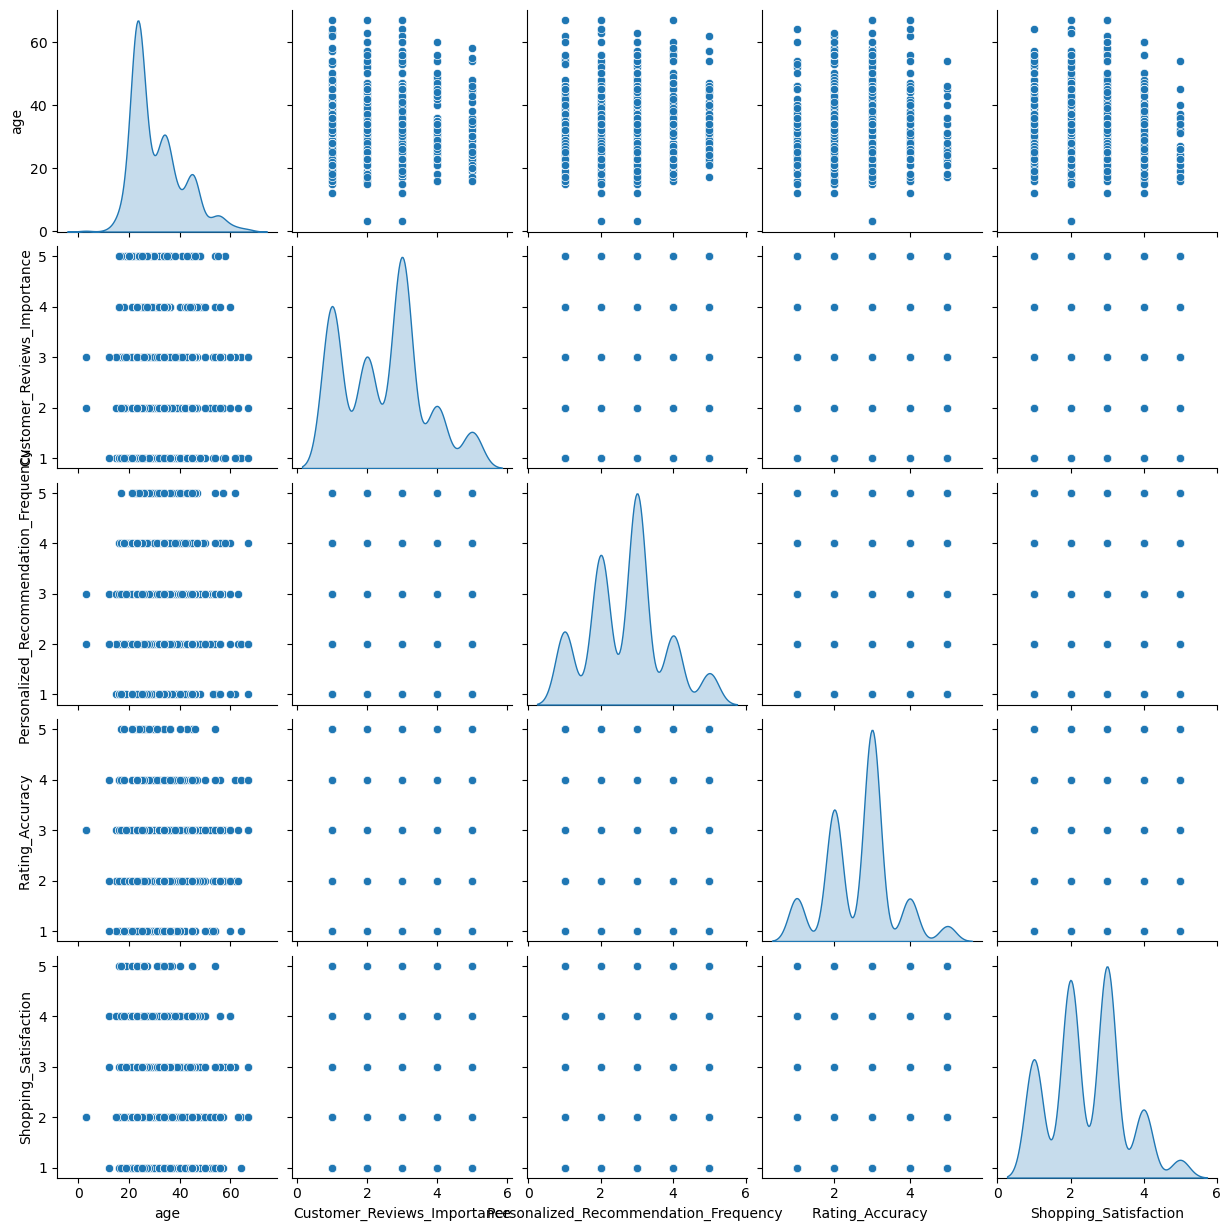

In [51]:
# Visualize relationships between variables using pairplot
sns.pairplot(data, diag_kind='kde')
plt.show()

In [52]:
# Save adjusted data to csv
data.to_csv('output.csv', index=False)